# **Final Project Task 5 - Census Modeling NN Regression**

Requirements

- Create a NN regression model on the Census dataset, with 'hours-per-week' target

- Model Selection and Setup:
    - Build a neural network model using a deep learning library like TensorFlow, Keras or PyTorch.
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - Train a simple NN model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable.
    - Feature Selection:
        - Neural Networks can learn feature importance automatically, so all relevant features should be included rather than manually selecting a subset.
        - Consider using embeddings for high-cardinality categorical features instead of one-hot encoding to improve efficiency.
    - Experimentation:
        - Focus on preprocessing techniques rather than manually selecting feature combinations. Ensure numerical features are normalized (e.g., MinMaxScaler, StandardScaler) and categorical features are properly encoded (e.g., one-hot encoding or embeddings for high-cardinality variables).
        - Experiment with different neural network architectures (e.g., number of layers, neurons per layer) and hyperparameters (e.g., activation functions, learning rates, dropout rates, and batch sizes).
        - Use techniques such as early stopping and learning rate scheduling to optimize model performance and prevent overfitting.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
7169    54           Private   94055     Bachelors             13   
14251   69           Private  141181       5th-6th              3   
21912   44           Private  245317  Some-college             10   
29459   29           Private  228860  Some-college             10   
8979    34  Self-emp-not-inc  204375   Prof-school             15   
6821    44           Private   71269  Some-college             10   
20009   71                 ?  108390  Some-college             10   
1739    57         Local-gov   52267       HS-grad              9   
15940   43         State-gov  222978     Doctorate             16   
20711   38           Private  289148       HS-grad              9   

              marital-status        occupation   relationship   race     sex  \
7169      Married-civ-spouse     Other-service        Husband  White    Male   
14251     Married-civ-spouse      Adm-clerical        Husband  White    Male   
21912     Married-civ-spouse      Craft-repair        Husband  White    Male   
29459     Married-civ-spouse   Exec-managerial        Husband  White    Male   
8979           Never-married    Prof-specialty  Not-in-family  White  Female   
6821                Divorced   Exec-managerial  Not-in-family  White    Male   
20009     Married-civ-spouse                 ?        Husband  White    Male   
1739      Married-civ-spouse  Transport-moving        Husband  White    Male   
15940              Separated    Prof-specialty      Unmarried  White  Female   
20711  Married-spouse-absent      Craft-repair      Unmarried  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
7169              0             0              40  United-States  <=50K  
14251          1797             0              40  United-States  <=50K  
21912             0             0              56  United-States   >50K  
29459             0          1887              50  United-States   >50K  
8979              0             0              60  United-States   >50K  
6821              0             0              50  United-States  <=50K  
20009          3432             0              20  United-States  <=50K  
1739              0             0              72  United-States  <=50K  
15940             0             0              40  United-States   >50K  
20711             0             0              40  United-States  <=50K

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(input_shape):
    model = Sequential([
        Dense(64, activation="relu", input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
    return model

# Build the model
input_shape = X_train.shape[1]
model = build_model(input_shape)
model.summary()

c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,153 (35.75 KB)

 Trainable params: 9,153 (35.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 584.7239 - mae: 18.2483 - val_loss: 117.4880 - val_mae: 7.7419
Epoch 2/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 143.0532 - mae: 9.0535 - val_loss: 116.6533 - val_mae: 7.6626
Epoch 3/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: 138.4857 - mae: 8.8327 - val_loss: 111.2994 - val_mae: 7.5170
Epoch 4/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - loss: 134.0110 - mae: 8.6517 - val_loss: 109.7968 - val_mae: 7.4142
Epoch 5/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 130.2872 - mae: 8.4871 - val_loss: 108.9654 - val_mae: 7.4306
Epoch 6/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - loss: 129.1308 - mae: 8.4113 - val_loss: 111.3625 - val_mae: 7.4859
Epoch 7/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - loss: 124.5813 - mae: 8.2451 - val_loss: 109.1928 - val_mae: 7.3171
Epoch 8/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - loss: 122.4280 - mae: 8.1390 - val_loss: 106.7017 - val_mae: 7.2143

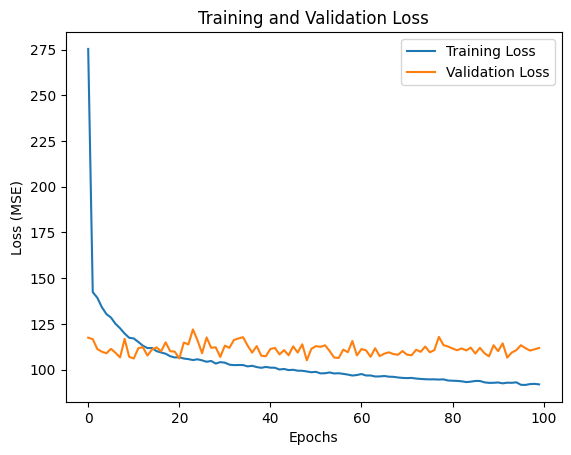

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Graficul prezintă evoluția pierderii (loss) în timpul antrenării și validării unui model de învățare automată pe parcursul a 100 de epoci. Pe axa verticală este reprezentată pierderea (Loss) măsurată în eroare pătratică medie (MSE), iar pe axa orizontală sunt reprezentate epocile (Epochs). Linia albastră reprezintă pierderea în timpul antrenării (Training Loss), iar linia portocalie reprezintă pierderea în timpul validării (Validation Loss). Se observă că pierderea în timpul antrenării scade semnificativ în primele epoci și continuă să scadă treptat, în timp ce pierderea în timpul validării rămâne relativ constantă după o scădere inițială. Acest grafic este relevant pentru a evalua performanța modelului și pentru a identifica eventuale probleme de supraînvățare (overfitting) sau subînvățare (underfitting).

In [7]:
correlation_with_target = X_train.corrwith(y_train["hours-per-week"].squeeze())
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index

X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_val_poly = poly.transform(X_val_selected)
X_test_poly = poly.transform(X_test_selected)

In [9]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a function to build the model for keras_tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation="relu", input_shape=(X_train_poly.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss="mse", metrics=["mae"])
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='hours_per_week_regression'
)

# Perform the search
tuner.search(X_train_poly, y_train["hours-per-week"], epochs=50, validation_data=(X_val_poly, y_val["hours-per-week"]))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from tuner_results\hours_per_week_regression\tuner0.json



c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
# Train the best model
best_model.fit(X_train_poly, y_train["hours-per-week"], epochs=50, validation_data=(X_val_poly, y_val["hours-per-week"]))

# Evaluate on test set
y_test_pred = best_model.predict(X_test_poly)

# Define the evaluation function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
	mae = mean_absolute_error(y_true, y_pred)
	mse = mean_squared_error(y_true, y_pred)
	rmse = mse ** 0.5  # Calculate RMSE manually
	r2 = r2_score(y_true, y_pred)
	return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

test_results = evaluate_model(y_test["hours-per-week"], y_test_pred)
print(test_results)

Epoch 1/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - loss: 118.7568 - mae: 7.6209 - val_loss: 117.2001 - val_mae: 7.4579
Epoch 2/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 115.9858 - mae: 7.5209 - val_loss: 117.6506 - val_mae: 7.5987
Epoch 3/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 115.1084 - mae: 7.5192 - val_loss: 117.0781 - val_mae: 7.5152
Epoch 4/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - loss: 116.5003 - mae: 7.5600 - val_loss: 117.6869 - val_mae: 7.4570
Epoch 5/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - loss: 119.0148 - mae: 7.6067 - val_loss: 117.5701 - val_mae: 7.5518
Epoch 6/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - loss: 117.1196 - mae: 7.5580 - val_loss: 117.5886 - val_mae: 7.5576
Epoch 7/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 117.8404 - mae: 7.5853 - val_loss: 117.1749 - val_mae: 7.4605
Epoch 8/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - loss: 113.8472 - mae: 7.4411 - val_loss: 118.7670 - val_mae: 7.6957
Epoch 9/